In [1]:
FENG_LFP_PATH = '/home/matt/data/InVivoLFPs/FengData/LFP_elec_combine.txt'
FENG_ITN_PATH = '/home/matt/data/InVivoLFPs/FengData/FR_PN_ITN.txt'

In [2]:
from lfp_prediction.data_gathering import TextCollector

frequency_band = (55, 85)

if 'dc' in locals():  # This is done to delete the massive variables and free up some space before attempting to use more
    del dc
dc = TextCollector(FENG_LFP_PATH)
lfp = dc.get_data(column=None)
dc = TextCollector(FENG_ITN_PATH)
itn = dc.get_data(column=2)

del dc

print(lfp.shape)
print(itn.shape)

(3000001, 1)
(3000001, 1)


In [3]:
from scipy import signal
import numpy as np

corr = signal.correlate(lfp, itn, mode='same')
corr /= np.max(corr)

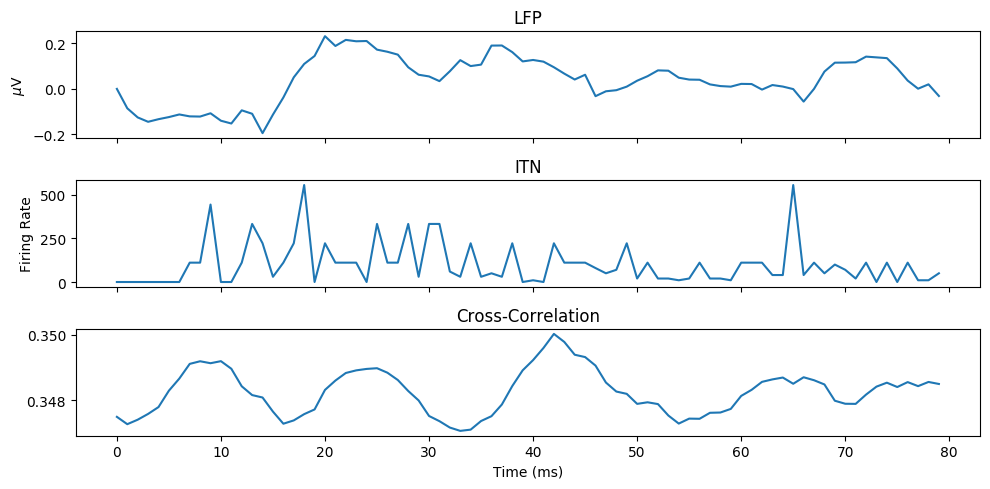

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex='all', figsize=(10, 5))
ax1.plot(lfp[:80])
ax1.set_title('LFP')
ax1.set_ylabel(r'$\mu$V')
ax2.plot(itn[:80])
ax2.set_title('ITN')
ax2.set_ylabel('Firing Rate')
ax3.plot(corr[:80])
ax3.set_title('Cross-Correlation')
ax3.set_xlabel('Time (ms)')
plt.tight_layout()
plt.show()

In [14]:
LFP_amp = abs(signal.hilbert(lfp))
threshold = np.mean(LFP_amp) + (2 * np.std(LFP_amp))

indices = np.argwhere(abs(lfp) > threshold)
print(indices[:,0])
print((indices.shape[0]/lfp.shape[0])*100)

[      2       3       4 ... 2999891 2999892 2999931]
4.539665153444949


In [19]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

list_of_bursts = consecutive(indices[:, 0])
large_bursts = [i for i in list_of_bursts if i.shape[0] >= 3]
print(len(list_of_bursts))
print(large_bursts)

55206
[array([2, 3, 4, 5]), array([19, 20, 21, 22, 23, 24, 25, 26, 27]), array([36, 37, 38, 39, 40]), array([72, 73, 74]), array([111, 112, 113, 114, 115, 116]), array([145, 146, 147, 148]), array([200, 201, 202]), array([384, 385, 386]), array([500, 501, 502, 503]), array([542, 543, 544, 545]), array([622, 623, 624]), array([663, 664, 665, 666, 667]), array([723, 724, 725]), array([741, 742, 743]), array([971, 972, 973]), array([1013, 1014, 1015]), array([1035, 1036, 1037]), array([1048, 1049, 1050]), array([1577, 1578, 1579]), array([1921, 1922, 1923, 1924, 1925, 1926]), array([1954, 1955, 1956, 1957, 1958]), array([1994, 1995, 1996, 1997]), array([2132, 2133, 2134, 2135, 2136]), array([2213, 2214, 2215, 2216]), array([2332, 2333, 2334]), array([2355, 2356, 2357, 2358, 2359]), array([2916, 2917, 2918, 2919, 2920, 2921]), array([3371, 3372, 3373]), array([3519, 3520, 3521, 3522]), array([3541, 3542, 3543]), array([3744, 3745, 3746, 3747]), array([3872, 3873, 3874, 3875]), array([3893,